# 외부 데이터 처리

1. 공공데이터나 오픈된 데이터를 파일로 다운 받아서 사용(csv, 엑셀, xml, json...)  
2. 웹 페이지를 읽어서 데이터 분석(그 웹 페이지 구조를 분석해야함)  

In [1]:
#pip install requests
import requests
html = requests.get('https://google.com').text  #웹 요청
html

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="71Sa0KV96dsTWpLmjmQNCA==">(function(){window.google={kEI:\'Ja_nYJr5D4uImAXw967ADQ\',kEXPI:\'0,772215,1,530320,56873,954,5104,207,4804,2316,383,246,5,1354,5251,1122515,1197779,503,83,328902,51224,16114,17444,11240,17572,4859,1361,9291,3027,4746,12835,4020,978,13228,3847,4192,6430,7432,7095,4517,2778,919,5081,1593,1279,2212,530,149,561,542,840,6297,3514,606,2025,1775,520,6343,8327,3227,2847,5,4774,34,7546,5096,7877,5036,3407,908,2,940,2615,3424,9718,3,346,230,6460,148,13975,4,1253,275,2304,1236,5803,4683,2015,4067,12269,2039,2658,872,3371,56,2402,655,31,15221,712,638,7080,3772,3494,3934,2522,3275,1513,1047,992,3102,2256,883,6,907,3,3541,1,8994,5269,447,1814,283,38,874,3426,2566,10618,1908,2,1394,2806,1715,2,

In [2]:
#pip install beautifulsoup4
from bs4 import BeautifulSoup

In [4]:
content = BeautifulSoup(html, 'html.parser')  #html소스를 돔 객체화 
title = content.html.head.title    #소스에서 title 태그 추출
print(title.string)  #string:태그의 텍스트 값 <태그>텍스트</태그>


Google


In [12]:
title_tag=content.find('title') #find() : 파라메터에 작성된 조건에 일치하는 태그 한개만 찾아줌
title_tag


<title>Google</title>

In [8]:
title_tag.string

'Google'

In [13]:
title_tag.get_text() #태그의 텍스트 반환

'Google'

In [20]:
title_tag2=content.find('meta')
title_tag2

<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>

In [21]:
meta_tags=content.select('meta')
meta_tags

[<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>,
 <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>]

In [22]:
for i in meta_tags:
    print(i['content'])

text/html; charset=UTF-8
/images/branding/googleg/1x/googleg_standard_color_128dp.png


태그 접근 방법  
1. root.html.body.h1 : 태그 한개 검색  
2. root.find(태그[속성]): 태그 1개 검색  
3. root.find_all(태그[속성]): 태그 모두 검색  
4. root.select(태그): 태그 모두 검색

In [6]:
link = content.html.body.a  #처음 a 태그 하나만 추출
links = content.find_all('a')
links
for i in links:
    print(i.get_text(), ':', i['href'])#속성값 읽기

이미지 : https://www.google.co.kr/imghp?hl=ko&tab=wi
지도 : https://maps.google.co.kr/maps?hl=ko&tab=wl
Play : https://play.google.com/?hl=ko&tab=w8
YouTube : https://www.youtube.com/?gl=KR&tab=w1
뉴스 : https://news.google.com/?tab=wn
Gmail : https://mail.google.com/mail/?tab=wm
드라이브 : https://drive.google.com/?tab=wo
더보기 » : https://www.google.co.kr/intl/ko/about/products?tab=wh
웹 기록 : http://www.google.co.kr/history/optout?hl=ko
설정 : /preferences?hl=ko
로그인 : https://accounts.google.com/ServiceLogin?hl=ko&passive=true&continue=https://www.google.com/&ec=GAZAAQ
고급검색 : /advanced_search?hl=ko&authuser=0
광고 프로그램 : /intl/ko/ads/
비즈니스 솔루션 : http://www.google.co.kr/intl/ko/services/
Google 정보 : /intl/ko/about.html
Google.co.kr : https://www.google.com/setprefdomain?prefdom=KR&prev=https://www.google.co.kr/&sig=K_4jIHz_XtQTHw0UhVptyCm9MBIR0%3D
개인정보처리방침 : /intl/ko/policies/privacy/
약관 : /intl/ko/policies/terms/


In [7]:
html = '<html><body><p class=a>aaa</p><p class=b>bbb</p><p class=a>ccc</p><p class=a id=xxx>ddd</p></body></html>'
root = BeautifulSoup(html, 'html.parser') 
p1 = root.find_all('p')
print('p1:', p1)
p2 = root.find_all('p', {'class':'a'})
print('p2:', p2)
p3 = root.find_all('p', {'class':'b'})
print('p3:', p3)
p4 = root.find('p', {'class':'a'})
print('p4:', p4)
p5 = root.select('p')
print('p5:', p5)
p6 = root.select('p.a')#태그.클래스명 //태그#id명
print('p6:', p6)
p7 = root.select('p.b')
print('p7:', p7)
p8 = root.select('p#xxx')
print('p8:', p8)

p1: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p2: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p3: [<p class="b">bbb</p>]
p4: <p class="a">aaa</p>
p5: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p6: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p7: [<p class="b">bbb</p>]
p8: [<p class="a" id="xxx">ddd</p>]


In [29]:
html = requests.get('http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp').text  #웹 요청
#html=html.decode('utf-8')
#지역별 일간 날씨를 출력
root = BeautifulSoup(html, 'html.parser') 
loc = root.find_all('location')
for i in loc:
    print(i.city.get_text(), '지역 날씨========')
    d = i.find_all('data')
    for j in d:
        print(j.tmef.string , ':', j.wf.string)

서울 지역 날씨========
2021-01-01 00:00 : 맑음
2021-01-01 12:00 : 맑음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 맑음
2021-01-04 00:00 : 맑음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 맑음
2021-01-05 12:00 : 맑음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
인천 지역 날씨========
2021-01-01 00:00 : 맑음
2021-01-01 12:00 : 맑음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 맑음
2021-01-04 00:00 : 맑음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 맑음
2021-01-05 12:00 : 맑음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
수원 지역 날씨========
2021-01-01 00:00 : 맑음
2021-01-01 12:00 : 맑음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 맑음
2021-01-04 00:00 : 맑음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 맑음
2021-01-05 12:00 : 맑음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
파주 지역 날씨========
2021-01-01 00:00 : 맑음
2021-01-01 12:00 : 맑음
2021-01-02 00:00 : 맑음
20

2021-01-04 00:00 : 구름많음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 구름많음
2021-01-05 12:00 : 구름많음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
울진 지역 날씨========
2021-01-01 00:00 : 구름많음
2021-01-01 12:00 : 구름많음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 구름많음
2021-01-04 00:00 : 구름많음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 구름많음
2021-01-05 12:00 : 구름많음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
울릉도 지역 날씨========
2021-01-01 00:00 : 구름많음
2021-01-01 12:00 : 구름많음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 구름많음
2021-01-04 00:00 : 구름많음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 구름많음
2021-01-05 12:00 : 구름많음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
제주 지역 날씨========
2021-01-01 00:00 : 흐리고 비/눈
2021-01-01 12:00 : 구름많음
2021-01-02 00:00 : 구름많음
2021-01-02 12:00 : 구름많음
2021-01-03 00:00 : 구름많음
2021-01-03 12:00 : 구름많음
2021-01-04 00:00 : 구름많음
2021-01-04 12:0

In [11]:
import json
j = '[{"id":"aaa", "pwd":"111"},{"id":"bbb", "pwd":"222"}]'#json 데이터

items = json.loads(j)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print(item['id'], ':', item['pwd'])

aaa : 111
bbb : 222


In [37]:
html = requests.get('https://api.github.com/repositories').text
items = json.loads(html)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print('id:', item['id'], ' / ', 'name:', item['name'], ' / ', 'login:', item['owner']['login'])

id: 1  /  name: grit  /  login: mojombo
id: 26  /  name: merb-core  /  login: wycats
id: 27  /  name: rubinius  /  login: rubinius
id: 28  /  name: god  /  login: mojombo
id: 29  /  name: jsawesome  /  login: vanpelt
id: 31  /  name: jspec  /  login: wycats
id: 35  /  name: exception_logger  /  login: defunkt
id: 36  /  name: ambition  /  login: defunkt
id: 42  /  name: restful-authentication  /  login: technoweenie
id: 43  /  name: attachment_fu  /  login: technoweenie
id: 48  /  name: microsis  /  login: caged
id: 52  /  name: s3  /  login: anotherjesse
id: 53  /  name: taboo  /  login: anotherjesse
id: 54  /  name: foxtracs  /  login: anotherjesse
id: 56  /  name: fotomatic  /  login: anotherjesse
id: 61  /  name: glowstick  /  login: mojombo
id: 63  /  name: starling  /  login: defunkt
id: 65  /  name: merb-more  /  login: wycats
id: 68  /  name: thin  /  login: macournoyer
id: 71  /  name: resource_controller  /  login: jamesgolick
id: 73  /  name: markaby  /  login: jamesgolick
i

In [14]:
j='['
j += '{"info":{"id":"aaa","pwd":"111"},"colors":["red","blue","yellow"]},'
j += '{"info":{"id":"bbb","pwd":"222"},"colors":["red","blue","yellow"]}'
j +=']'

items = json.loads(j)#제이슨 파싱하여 객체화.
for item in items:
    info=item['info']
    arr=item['colors']
    print(info['id'], ' / ', info['pwd'])
    for a in arr:
        print(a,end=', ')
    print()

aaa  /  111
red, blue, yellow, 
bbb  /  222
red, blue, yellow, 


In [5]:
#pip install lxml
import pandas as pd

def get_code(name):
    a = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', index_col='회사명')[0]
    code = a.loc[name, '종목코드']
    code = '{:0=6d}'.format(code)
    return code           

In [6]:
code=get_code('효성')
code

'004800'

In [ ]:
#pip install html5lib
url = 'https://finance.naver.com/item/sise_day.nhn?code='+code
    a = pd.read_html(url)[0]

In [3]:
def get_stock_info(code):
    url = 'https://finance.naver.com/item/sise_day.nhn?code='+code
    a = pd.read_html(url)[0]
    a = a.dropna()#NAN 줄 제거
    return a

In [4]:
info = get_stock_info(get_code('삼성전자'))
info

NameError: name 'get_code' is not defined

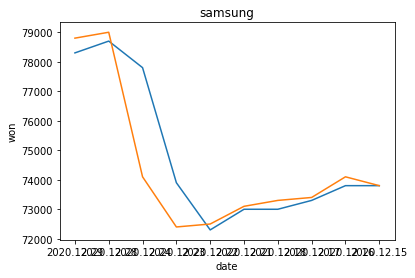

In [16]:
import matplotlib.pyplot as plt

plt.plot(info['날짜'], info['종가'])
plt.plot(info['날짜'], info['시가'])
plt.title('samsung')
plt.xlabel('date')
plt.ylabel('won')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as tk

x=np.arange(1, 10, 1)
y=2*x**2
fig = Figure(figsize=(10, 7), dpi=100)  #그리프 그릴 창 생성
fig.add_subplot(1,1,1).plot(x, y)#창에 그래프 하나 추가

window = tk.Tk()  #Tk 객체 생성. 기본 윈도우 객체
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()
window.mainloop()
